In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import skfda
from skfda.preprocessing.dim_reduction.projection import FPCA
from skfda.representation.basis import FourierBasis, BSplineBasis
import scipy 
from sklearn.preprocessing import StandardScaler

Text(0.5, 1.0, 'True Functions')

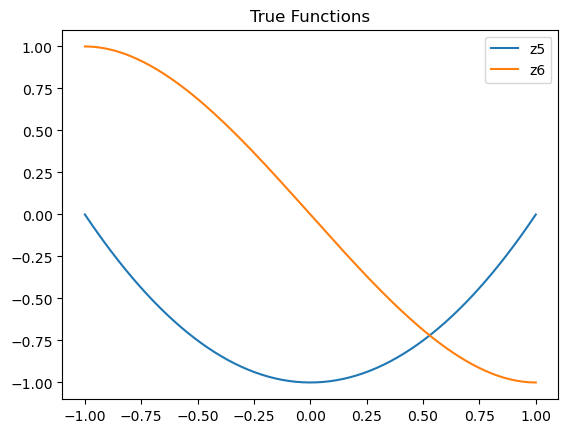

In [4]:
t = np.linspace(-1, 1,200)
w = 2/200
# Define orthogonal functions for w's
def w1_true(t):
    return np.sin(2 *np.pi* t)

def w2_true(t):
    return np.cos(2*np.pi *t)

def w5_true(t):
    return np.sin(6 * np.pi * t)

# Function for z
def z1_true(t):
    return 1.5/2*(3*t**2-1)
def z2_true(t):
    return (5*t**3-3*t)

def z3_true(t):
    return (1/4)*(35*t**4-30*t**2+3)
def z4_true(t):
    return (3/10)*(60*t**5-70*t**3+15*t)

def z5_true(t):
    return (t**2-1)
def z6_true(t):
    return (0.5)*(t**3-3*t)

def z7_true(t):
    return t**3-2*t**2+2
def z8_true(t):
    return -5.75*t**2 + t + 1
plt.plot(t,z5_true(t), label = 'z5')
plt.plot(t,z6_true(t), label = 'z6')
#plt.plot(t,z2_true(t), label = 's2: unique')
plt.legend()
plt.title("True Functions")
#plt.plot(t, (w**(-0.5))*sorted_eigenvectors[:,0])
#plt.plot(t, (w**(-0.5))*-1*sorted_eigenvectors[:,1])

In [24]:
l2_distance_with_sign(z4_true,(w**(-0.5))*sorted_eigenvectors[:,1], t)

0.0573517087868284

In [5]:
import numpy as np

# Define time points
t = np.linspace(-1, 1, 200)
w = 2/200
# Define orthogonal functions for w's
def w1_true(t):
    return np.sin(2 * np.pi * t)

def w2_true(t):
    return np.cos(2 * np.pi * t)

def w3_true(t):
    return np.cos(np.pi * t)

def w5_true(t):
    return np.cos(4 * np.pi * t)

# Function for z
def z1_true(t):
    return 1.5/2*(3*t**2-1)
def z2_true(t):
    return (5*t**3-3*t)

def z3_true(t):
    return (1/4)*(35*t**4-30*t**2+3)
def z4_true(t):
    return (3/10)*(60*t**5-70*t**3+15*t)
def z5_true(t):
    return (t**2-1)
def z6_true(t):
    return (0.5)*(t**3-3*t)

def z7_true(t):
    return t**3-2*t**2+2
def z8_true(t):
    return -5.75*t**2 + t + 1

# Define a time-dependent error amplitude function
def error_amplitude(t, amplitude=1):
    return amplitude * np.sin(2 * np.pi * t)

# Generate observations for x(t) and y(t) with time-dependent error
def generate_observations(t, N, M, error_amplitude_fn):
    x_observations = []
    y_observations = []

    for _ in range(N):
        a1 = np.random.uniform(0, 1)
        a2 = np.random.uniform(0, 1)
        a3 = np.random.uniform(0, 1)
        a4 = np.random.uniform(0, 1)
        a5 = np.random.uniform(0, 1)

        error = np.random.normal(0, 1, len(t)) * error_amplitude(t)
        x =  a1*w1_true(t)+a2*w3_true(t)+a3*w5_true(t)+a4*z5_true(t) + a5*z6_true(t)
        x_observations.append(x)

    for _ in range(M):
        a1 = np.random.uniform(0, 1)
        a2 = np.random.uniform(0, 1)
        a3 = np.random.uniform(0, 1)
        a4 = np.random.uniform(0, 1)

        error = np.random.normal(0, 1, len(t)) * error_amplitude(t)
        y =  a1*w1_true(t)+a2*w3_true(t)+a3*w5_true(t)
        y_observations.append(y)

    return x_observations, y_observations

# Example usage
N = 100000# Number of x curves
M = 100000  # Number of y curves
x_observations, y_observations = generate_observations(t, N, M, error_amplitude)

X = np.array(x_observations)
Y = np.array(y_observations)

X = X - np.mean(X, axis = 0)
Y = Y - np.mean(Y, axis = 0)


Vx = (1/(N-1)) * np.dot(X.T, X)
Vy = (1/(M-1)) * np.dot(Y.T, Y)


# Perform the eigen decomposition on the covariance matrix V
eigenvalues, eigenvectors = np.linalg.eig(w*(Vx-1*Vy))

# Sort the eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]


C:\Users\Eric\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


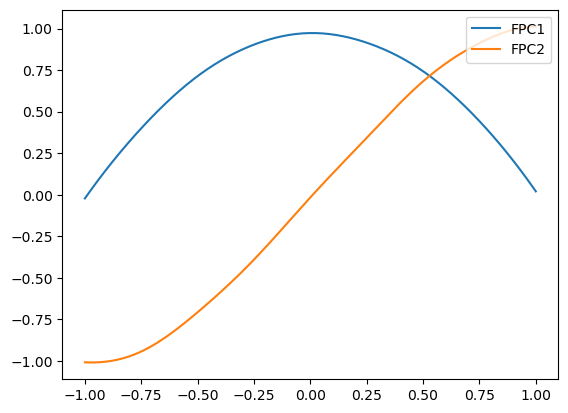

In [6]:
plt.plot(t, (w**(-0.5))*-1*sorted_eigenvectors[:,0])
plt.plot(t, (w**(-0.5))*-1*sorted_eigenvectors[:,1])
#plt.plot(t, (w**(-0.5))*sorted_eigenvectors[:,2])
#plt.plot(t, (w**(-0.5))*sorted_eigenvectors[:,3])
plt.legend(['FPC1', 'FPC2'], loc = "upper right")

In [114]:
sorted_eigenvalues[0]-sorted_eigenvalues[1]

0.015276631306366972

In [127]:
x = np.sort(abs(sorted_eigenvalues)/(w**(-0.5)))
x[-1] - x[-2]

0.001527663130636698

In [8]:
l2_distance_with_sign(z5_true,(w**(-0.5))*sorted_eigenvectors[:,0],t)


0.037604641175504314

In [9]:
l2_distance_with_sign(z6_true,(w**(-0.5))*sorted_eigenvectors[:,1],t)

0.025414924342314966

Text(0.5, 1.0, 'CFPCA')

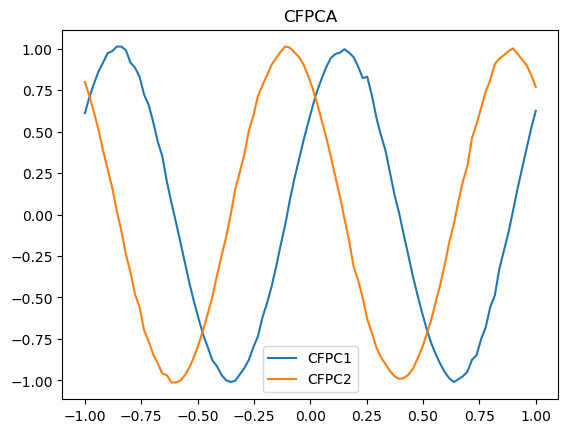

In [51]:
import numpy as np

# Define time points
t = np.linspace(-1, 1, 100)

# Define orthogonal functions for w's
def w1_true(t):
    return np.sin(2 * np.pi * t)

def w2_true(t):
    return np.cos(2 * np.pi * t)

def w3_true(t):
    return np.cos(np.pi * t)

def w4_true(t):
    return np.cos(np.pi * t)

def w5_true(t):
    return np.cos(4 * np.pi * t)

# Define orthogonal functions for z's
def z1_true(t):
    return (3 * t ** 2 - 1)

def z2_true(t):
    return (5 * t ** 3 - 3 * t)

def z3_true(t):
    return (1/4)*(35*t**4-30*t**2+3)
def z4_true(t):
    return (1/4)*(63*t**5-70*t**3+15*t)

# Define a time-dependent error amplitude function
def error_amplitude(t, amplitude=1):
    return amplitude * np.sin(2 * np.pi * t)

# Generate observations for x(t) and y(t) with time-dependent error
def generate_observations(t, N, M, error_amplitude_fn):
    x_observations = []
    y_observations = []

    for _ in range(N):
        a1 = np.random.uniform(0, 1)
        a2 = np.random.uniform(0, 1)
        a3 = np.random.uniform(0, 1)
        a4 = np.random.uniform(0, 1)
        a5 = np.random.uniform(0, 1)

        error = np.random.normal(0, 1, len(t)) * error_amplitude(t)
        x =  a1*w2_true(t)+a2*w1_true(t)+a4*z1_true(t)+a5*z2_true(t)+error
        x_observations.append(x)

    for _ in range(M):
        a1 = np.random.uniform(0, 1)
        a2 = np.random.uniform(0, 1)
        a3 = np.random.uniform(0, 1)
        a4 = np.random.uniform(0, 1)

        error = np.random.normal(0, 1, len(t)) * error_amplitude(t)
        y = a1*z2_true(t)+a2*z1_true(t) +error
        y_observations.append(y)
    return x_observations, y_observations

# Example usage
N = 100000  # Number of x curves
M = 100000  # Number of y curves
x_observations, y_observations = generate_observations(t, N, M, error_amplitude)


fd_X = skfda.FDataGrid(x_observations, t)
fd_Y = skfda.FDataGrid(y_observations, t)
basis = skfda.representation.basis.BSplineBasis(n_basis=9)
X_basis = fd_X.to_basis(basis)
Y_basis = fd_Y.to_basis(basis)


X_fd_data = fd_X.data_matrix.reshape(fd_X.data_matrix.shape[:-1])
Y_fd_data = fd_Y.data_matrix.reshape(fd_Y.data_matrix.shape[:-1])

X_identity = np.eye(len(fd_X.grid_points[0]))
Y_identity = np.eye(len(fd_Y.grid_points[0]))

X_weights = scipy.integrate.simpson(X_identity, fd_X.grid_points[0])
Y_weights = scipy.integrate.simpson(Y_identity, fd_Y.grid_points[0])

X_weights_matrix = np.diag(X_weights)
Y_weights_matrix = np.diag(Y_weights)


X_factorization_matrix = X_weights_matrix.astype(float)
Y_factorization_matrix = Y_weights_matrix.astype(float)

X_Lt = np.linalg.cholesky(X_factorization_matrix).T
Y_Lt = np.linalg.cholesky(Y_factorization_matrix).T

new_data_matrix_X = X_fd_data @ X_weights_matrix
new_data_matrix_X = np.linalg.solve(X_Lt.T, new_data_matrix_X.T).T

new_data_matrix_Y = Y_fd_data @ Y_weights_matrix
new_data_matrix_Y = np.linalg.solve(Y_Lt.T, new_data_matrix_Y.T).T



# Assuming boys_list is your data matrix represented as a list of lists
X = new_data_matrix_X
Y = new_data_matrix_Y

# Center the matrix X by subtracting the mean of each column
X_centered = X - np.mean(X, axis=0)
Y_centered = Y - np.mean(Y, axis=0)


Vx = (1/(N-1)) * np.dot(X_centered.T, X_centered)
Vy = (1/(M-1)) * np.dot(Y_centered.T, Y_centered)


# Perform the eigen decomposition on the covariance matrix V
eigenvalues, eigenvectors = np.linalg.eig(Vx - 1*Vy)

# Sort the eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]


#pca = PCA(n_components=2)
#pca.fit(new_data_matrix_X)

components = np.linalg.solve(X_Lt, np.real(sorted_eigenvectors)[:,:4]).T
plt.plot(t, components[0])
plt.plot(t, components[1])
plt.legend(['CFPC1', 'CFPC2'])
#plt.plot(t, components[2])
#plt.plot(t, components[3])

plt.title("CFPCA")
#NON PERIODIC CASE

In [83]:
len(np.diag(X_weights))

100

In [70]:
fd_X.grid_points[0]

array([-1.        , -0.97979798, -0.95959596, -0.93939394, -0.91919192,
       -0.8989899 , -0.87878788, -0.85858586, -0.83838384, -0.81818182,
       -0.7979798 , -0.77777778, -0.75757576, -0.73737374, -0.71717172,
       -0.6969697 , -0.67676768, -0.65656566, -0.63636364, -0.61616162,
       -0.5959596 , -0.57575758, -0.55555556, -0.53535354, -0.51515152,
       -0.49494949, -0.47474747, -0.45454545, -0.43434343, -0.41414141,
       -0.39393939, -0.37373737, -0.35353535, -0.33333333, -0.31313131,
       -0.29292929, -0.27272727, -0.25252525, -0.23232323, -0.21212121,
       -0.19191919, -0.17171717, -0.15151515, -0.13131313, -0.11111111,
       -0.09090909, -0.07070707, -0.05050505, -0.03030303, -0.01010101,
        0.01010101,  0.03030303,  0.05050505,  0.07070707,  0.09090909,
        0.11111111,  0.13131313,  0.15151515,  0.17171717,  0.19191919,
        0.21212121,  0.23232323,  0.25252525,  0.27272727,  0.29292929,
        0.31313131,  0.33333333,  0.35353535,  0.37373737,  0.39

In [78]:
scipy.integrate.simpson(X_identity[1,:], fd_X.grid_points[0])

0.021885521885521918

In [79]:
X_weights

array([0.00841751, 0.02188552, 0.02020202, 0.02020202, 0.02020202,
       0.02020202, 0.02020202, 0.02020202, 0.02020202, 0.02020202,
       0.02020202, 0.02020202, 0.02020202, 0.02020202, 0.02020202,
       0.02020202, 0.02020202, 0.02020202, 0.02020202, 0.02020202,
       0.02020202, 0.02020202, 0.02020202, 0.02020202, 0.02020202,
       0.02020202, 0.02020202, 0.02020202, 0.02020202, 0.02020202,
       0.02020202, 0.02020202, 0.02020202, 0.02020202, 0.02020202,
       0.02020202, 0.02020202, 0.02020202, 0.02020202, 0.02020202,
       0.02020202, 0.02020202, 0.02020202, 0.02020202, 0.02020202,
       0.02020202, 0.02020202, 0.02020202, 0.02020202, 0.02020202,
       0.02020202, 0.02020202, 0.02020202, 0.02020202, 0.02020202,
       0.02020202, 0.02020202, 0.02020202, 0.02020202, 0.02020202,
       0.02020202, 0.02020202, 0.02020202, 0.02020202, 0.02020202,
       0.02020202, 0.02020202, 0.02020202, 0.02020202, 0.02020202,
       0.02020202, 0.02020202, 0.02020202, 0.02020202, 0.02020

In [7]:
def l2_distance_with_sign(true_func, estimated_func, t):
    """
    Computes the L2 distance between the true function values and the estimated function values,
    adjusted for the interval length, considering both the original and sign-flipped versions of the estimated function.
    
    true_func: A callable function that takes np.array t and returns an array of function values.
    estimated_func: A NumPy array representing the estimated function values at points t.
    t: np.array of points representing the discretized interval over which to compute the distance.
    
    Returns the minimum of the two distances, adjusted for the discretization interval length.
    """
    # Compute true function values at points t
    true_values = true_func(t)
    
    # Ensure estimated_func is an array and matches t in length
    assert len(estimated_func) == len(t), "estimated_func must have the same number of points as t"
    
    # Calculate the differences
    diff_original = true_values - estimated_func
    diff_flipped = true_values + estimated_func
    
    # Calculate the interval width (Δx)
    delta_x = np.mean(np.diff(t))
    
    # Calculate the norm, adjusted for the interval width
    distance_original = np.sqrt(np.sum(diff_original**2)* delta_x)
    distance_flipped = np.sqrt(np.sum(diff_flipped**2) * delta_x)
    
    return np.real(min(distance_original, distance_flipped))


In [9]:
def compute_eigenfunctions2(alpha, error_func, N, M):

    x_observations = []
    y_observations = []

    for _ in range(N):
        a1 = np.random.uniform(0, 1)
        a2 = np.random.uniform(0, 1)
        a3 = np.random.uniform(0, 1)
        a4 = np.random.uniform(0, 1)
        a5 = np.random.uniform(0, 1)

        error = np.random.normal(0, 1, len(t)) * error_amplitude(t)
        x =  a1*w2_true(t)+a2*w1_true(t)+a4*z1_true(t)+a5*z2_true(t)
        x_observations.append(x)

    for _ in range(M):
        a1 = np.random.uniform(0, 1)
        a2 = np.random.uniform(0, 1)
        a3 = np.random.uniform(0, 1)
        a4 = np.random.uniform(0, 1)

        error = np.random.normal(0, 1, len(t)) * error_amplitude(t)
        y = a1*z2_true(t)+a2*z1_true(t) 
        y_observations.append(y)

    X = np.array(x_observations)
    Y = np.array(y_observations)

    X = X - np.mean(X, axis = 0)
    Y = Y - np.mean(Y, axis = 0)


    Vx = (1/(N-1)) * np.dot(X.T, X)
    Vy = (1/(M-1)) * np.dot(Y.T, Y)


    # Perform the eigen decomposition on the covariance matrix V
    eigenvalues, eigenvectors = np.linalg.eig(Vx-alpha*Vy)

    # Sort the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    return sorted_eigenvectors




def compute_eigenfunctions(alpha, error_func, N, M):
    x_observations = []
    y_observations = []


    
    for _ in range(N):
        a1 = np.random.uniform(0, 1)
        a2 = np.random.uniform(0, 1)
        a3 = np.random.uniform(0, 1)
        a4 = np.random.uniform(0, 1)
        a5 = np.random.uniform(0, 1)

        error = np.random.normal(0, 1, len(t)) * error_amplitude(t)
        x =  a1*w1_true(t) + a2*w2_true(t) + a4* z1_true(t) +a5*z2_true(t)
        x_observations.append(x)

    for _ in range(M):
        a1 = np.random.uniform(0, 1)
        a2 = np.random.uniform(0, 1)
        a3 = np.random.uniform(0, 1)
        a4 = np.random.uniform(0, 1)

        error = np.random.normal(0, 1, len(t)) * error_amplitude(t)
        y = a1*z1_true(t) + a2*z2_true(t)
        y_observations.append(y)
        
    fd_X = skfda.FDataGrid(x_observations, t)
    fd_Y = skfda.FDataGrid(y_observations, t)
    basis = skfda.representation.basis.BSplineBasis(n_basis=9)
    X_basis = fd_X.to_basis(basis)
    Y_basis = fd_Y.to_basis(basis)

    X_fd_data = fd_X.data_matrix.reshape(fd_X.data_matrix.shape[:-1])
    Y_fd_data = fd_Y.data_matrix.reshape(fd_Y.data_matrix.shape[:-1])

    X_identity = np.eye(len(fd_X.grid_points[0]))
    Y_identity = np.eye(len(fd_Y.grid_points[0]))

    X_weights = scipy.integrate.simpson(X_identity, fd_X.grid_points[0])
    Y_weights = scipy.integrate.simpson(Y_identity, fd_Y.grid_points[0])

    X_weights_matrix = np.diag(X_weights)
    Y_weights_matrix = np.diag(Y_weights)

    X_factorization_matrix = X_weights_matrix.astype(float)
    Y_factorization_matrix = Y_weights_matrix.astype(float)

    X_Lt = np.linalg.cholesky(X_factorization_matrix).T
    Y_Lt = np.linalg.cholesky(Y_factorization_matrix).T

    new_data_matrix_X = X_fd_data @ X_weights_matrix
    new_data_matrix_X = np.linalg.solve(X_Lt.T, new_data_matrix_X.T).T

    new_data_matrix_Y = Y_fd_data @ Y_weights_matrix
    new_data_matrix_Y = np.linalg.solve(Y_Lt.T, new_data_matrix_Y.T).T

    # Assuming boys_list is your data matrix represented as a list of lists
    X = new_data_matrix_X
    Y = new_data_matrix_Y

    # Center the matrix X by subtracting the mean of each column
    X_centered = X - np.mean(X, axis=0)
    Y_centered = Y - np.mean(Y, axis=0)

    Vx = (1/(N-1)) * np.dot(X_centered.T, X_centered)
    Vy = (1/(M-1)) * np.dot(Y_centered.T, Y_centered)


    # Perform the eigen decomposition on the covariance matrix V
    eigenvalues, eigenvectors = np.linalg.eig(Vx - alpha*Vy)

    # Sort the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]


    components = np.linalg.solve(X_Lt, np.real(sorted_eigenvectors)[:,:4]).T
    return components


Average L2 Distance for z1: (0.04189151544058735+0j)
Average L2 Distance for z2: (0.10770534043836716+0j)


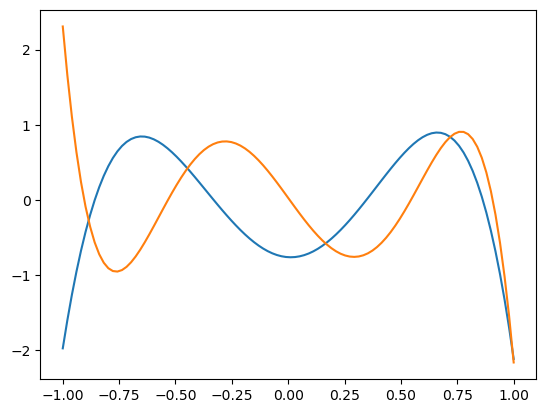

In [64]:
import numpy as np

w = 2/100
def error_amplitude(t, amplitude=1):
    return amplitude * np.sin(2 * np.pi * t)


def run_simulation(n_simulations, t, N, M):
    
    l2_distances_z1 = []
    l2_distances_z2 = []
   # inner_product_norm_z1 = []
   # inner_product_norm_z2 = []

    for _ in range(n_simulations):

        components = compute_eigenfunctions2(1,error_amplitude,N,M)
        plt.plot(t,(w**(-0.5))*components[:,0])
        plt.plot(t,(w**(-0.5))*components[:,1])
        l2_dist_z1 = l2_distance_with_sign(w1_true, (w**(-0.5))*components[:,0], t)
        l2_dist_z2 = l2_distance_with_sign(w2_true, (w**(-0.5))*components[:,1], t)
        
        #inner_z1 = eigenfunction_norm_array(components[0],z1_true(t))
        #inner_z2 = eigenfunction_norm_array(components[1],z2_true(t))

        
        l2_distances_z1.append(l2_dist_z1)
        l2_distances_z2.append(l2_dist_z2)
        
     #   inner_product_norm_z1.append(inner_z1)
    #    inner_product_norm_z2.append(inner_z2)

    avg_l2_distance_z1 = np.mean(l2_distances_z1)
    avg_l2_distance_z2 = np.mean(l2_distances_z2)
   # avg_inner_z1 = np.mean(inner_product_norm_z1)
   # avg_inner_z2 = np.mean(inner_product_norm_z2)
   
    return avg_l2_distance_z1, avg_l2_distance_z2 

# Specify your parameters
n_simulations = 1 # or your desired number of simulations
t = np.linspace(-1, 1, 100)  # time points
N = 100000# Number of x curves
M = 100000 # Number of y curves

# Run the simulation
l2_z1, l2_z2 = run_simulation(n_simulations, t, N, M)

print(f"Average L2 Distance for z1: {l2_z1}")
print(f"Average L2 Distance for z2: {l2_z2}")

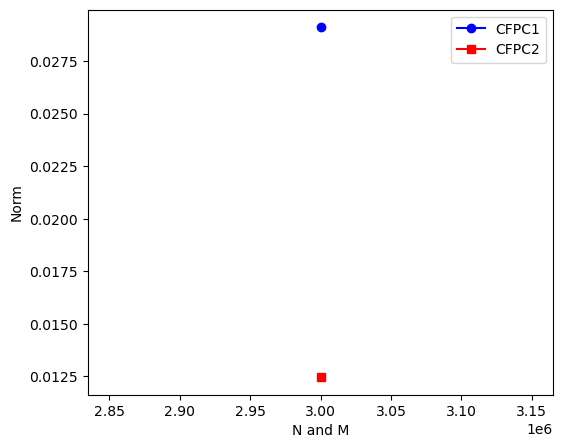

In [36]:
def error_amplitude(t, amplitude=1):
    return amplitude * np.sin(2 * np.pi * t)


def compute_eigenfunctions3(alpha, error_func, N, M):

    x_observations = []
    y_observations = []

    for _ in range(N):
        a1 = np.random.uniform(0, 1)
        a2 = np.random.uniform(0, 1)
        a3 = np.random.uniform(0, 1)
        a4 = np.random.uniform(0, 1)
        a5 = np.random.uniform(0, 1)

        #error = np.random.normal(0, 1, len(t)) * error_amplitude(t)
        x =  a1*w1_true(t)+a2*w3_true(t)+a3*w5_true(t)+a4*z5_true(t) + a5*z6_true(t)
        x_observations.append(x)

    for _ in range(M):
        a1 = np.random.uniform(0, 1)
        a2 = np.random.uniform(0, 1)
        a3 = np.random.uniform(0, 1)
        a4 = np.random.uniform(0, 1)

        #error = np.random.normal(0, 1, len(t)) * error_amplitude(t)
        y =  a1*w1_true(t)+a2*w3_true(t)+a3*w5_true(t)
        y_observations.append(y)
        
    X = np.array(x_observations)
    Y = np.array(y_observations)

    X = X - np.mean(X, axis = 0)
    Y = Y - np.mean(Y, axis = 0)


    Vx = (1/(N-1)) * np.dot(X.T, X)
    Vy = (1/(M-1)) * np.dot(Y.T, Y)


    # Perform the eigen decomposition on the covariance matrix V
    eigenvalues, eigenvectors = np.linalg.eig(w*(Vx-alpha*Vy))

    # Sort the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    return sorted_eigenvectors



def run_simulation(n_simulations, t, N, M):
    l2_distances_z1 = []
    l2_distances_z2 = []

    for _ in range(n_simulations):
        components = compute_eigenfunctions3(1, error_amplitude, N, M)
        #plt.plot((w**(-0.5))*components[:,0])
        #plt.plot((w**(-0.5))*components[:,1])
        l2_dist_z1 = l2_distance_with_sign(z5_true, (w**(-0.5))*components[:,0], t)
        l2_dist_z2 = l2_distance_with_sign(z6_true, (w**(-0.5))*components[:,1], t)
        
        l2_distances_z1.append(l2_dist_z1)
        l2_distances_z2.append(l2_dist_z2)

    avg_l2_distance_z1 = np.mean(l2_distances_z1)
    avg_l2_distance_z2 = np.mean(l2_distances_z2)
    
    return avg_l2_distance_z1, avg_l2_distance_z2

# Parameters for multiple simulations
ns = [3000000]  # Values of N and M to iterate over
n_simulations =  20 # Reduced number of simulations for quicker execution
t = np.linspace(-1, 1, 100)  # Time points
w = 2/100
# Store results for plotting
results = {'N': [], 'Avg_L2_z1': [], 'Avg_L2_z2': []}

for n in ns:
    avg_l2_distance_z1, avg_l2_distance_z2 = run_simulation(n_simulations, t, n, n)
    results['N'].append(n)
    results['Avg_L2_z1'].append(avg_l2_distance_z1)
    results['Avg_L2_z2'].append(avg_l2_distance_z2)

# Plotting the results
plt.figure(figsize=(6, 5))
plt.plot(results['N'], results['Avg_L2_z1'], marker='o', linestyle='-', color='blue', label='CFPC1')
plt.plot(results['N'], results['Avg_L2_z2'], marker='s', linestyle='-', color='red', label='CFPC2')
plt.xlabel('N and M')
plt.ylabel('Norm')
plt.legend()
plt.show()

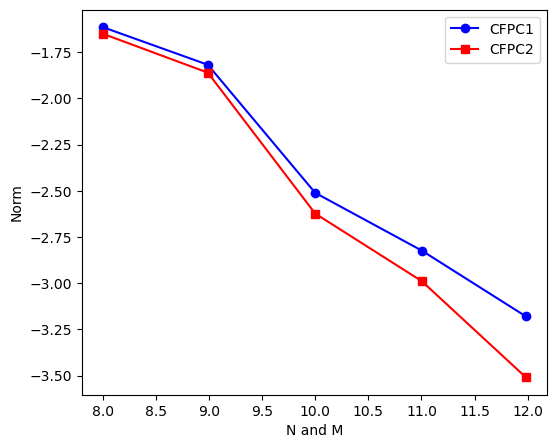

In [26]:
plt.figure(figsize=(6, 5))
plt.plot(np.log(results['N']), np.log(results['Avg_L2_z1']), marker='o', linestyle='-', color='blue', label='CFPC1')
plt.plot(np.log(results['N']), np.log(results['Avg_L2_z2']), marker='s', linestyle='-', color='red', label='CFPC2')
plt.xlabel('N and M')
plt.ylabel('Norm')
plt.legend()
plt.show()

In [37]:
results['Avg_L2_z1']

[0.029116651938042776]

In [32]:
results['Avg_L2_z1']

[0.033950346294588526, 0.03132922149879087]

In [38]:
results['Avg_L2_z2']

[0.01245956475781396]

In [33]:
results['Avg_L2_z2']

[0.020219922405087, 0.015839137442060933]

In [35]:
np.e**15

3269017.372472108

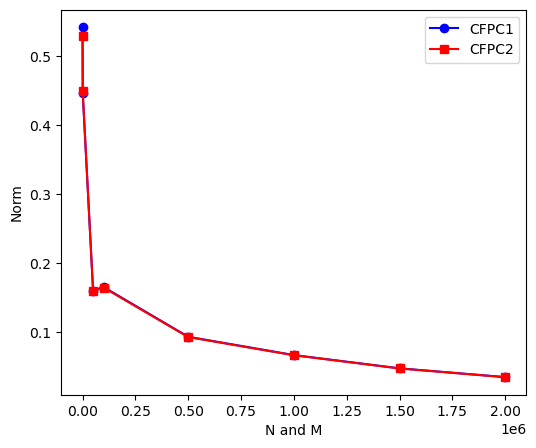

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import skfda

# Mock definitions for the true functions (for simulation purposes)
def w1_true(t): return np.sin(2 * np.pi * t)
def w2_true(t): return np.cos(2 * np.pi * t)
def z1_true(t):
    return (3 * t ** 2 - 1)
def z2_true(t):
    return (5 * t ** 3 - 3 * t)

def error_amplitude(t, amplitude=1):
    return amplitude * np.sin(2 * np.pi * t)

def l2_distance_with_sign(true_func, estimated_func, t):
    """
    Computes the L2 distance between the true function values and the estimated function values,
    adjusted for the interval length, considering both the original and sign-flipped versions of the estimated function.
    
    true_func: A callable function that takes np.array t and returns an array of function values.
    estimated_func: A NumPy array representing the estimated function values at points t.
    t: np.array of points representing the discretized interval over which to compute the distance.
    
    Returns the minimum of the two distances, adjusted for the discretization interval length.
    """
    # Compute true function values at points t
    true_values = true_func(t)
    
    # Ensure estimated_func is an array and matches t in length
    assert len(estimated_func) == len(t), "estimated_func must have the same number of points as t"
    
    # Calculate the differences
    diff_original = true_values - estimated_func
    diff_flipped = true_values + estimated_func
    
    # Calculate the interval width (Δx)
    delta_x = np.mean(np.diff(t))
    
    # Calculate the norm, adjusted for the interval width
    distance_original = np.sqrt(np.sum(diff_original**2) * delta_x)
    distance_flipped = np.sqrt(np.sum(diff_flipped**2) * delta_x)
    
    return np.real(min(distance_original, distance_flipped))


def run_simulation(n_simulations, t, N, M):
    l2_distances_z1 = []
    l2_distances_z2 = []

    for _ in range(n_simulations):
        components = compute_eigenfunctions2(1, error_amplitude, N, M)
        l2_dist_z1 = l2_distance_with_sign(w2_true, (w**(-0.5))*components[:,0], t)
        l2_dist_z2 = l2_distance_with_sign(w1_true, (w**(-0.5))*components[:,1], t)
        
        l2_distances_z1.append(l2_dist_z1)
        l2_distances_z2.append(l2_dist_z2)

    avg_l2_distance_z1 = np.mean(l2_distances_z1)
    avg_l2_distance_z2 = np.mean(l2_distances_z2)
    
    return avg_l2_distance_z1, avg_l2_distance_z2

# Parameters for multiple simulations
ns = [100,1000,50000,100000,1000000,1500000]  # Values of N and M to iterate over
n_simulations = 10  # Reduced number of simulations for quicker execution
t = np.linspace(-1, 1, 100)  # Time points

# Store results for plotting
results = {'N': [], 'Avg_L2_z1': [], 'Avg_L2_z2': []}

for n in ns:
    avg_l2_distance_z1, avg_l2_distance_z2 = run_simulation(n_simulations, t, n, n)
    results['N'].append(n)
    results['Avg_L2_z1'].append(avg_l2_distance_z1)
    results['Avg_L2_z2'].append(avg_l2_distance_z2)

# Plotting the results
plt.figure(figsize=(6, 5))
plt.plot(results['N'], results['Avg_L2_z1'], marker='o', linestyle='-', color='blue', label='CFPC1')
plt.plot(results['N'], results['Avg_L2_z2'], marker='s', linestyle='-', color='red', label='CFPC2')
plt.xlabel('N and M')
plt.ylabel('Norm')
plt.legend()
plt.show()


In [11]:

results['Avg_L2_z1']

[0.5413129423164509,
 0.44545654826463466,
 0.1598991453222199,
 0.16487619683052038,
 0.09289513111836872,
 0.06637274818333015,
 0.04715457718241349,
 0.03444392349542333]

In [12]:
results['Avg_L2_z2']

[0.5287357381497737,
 0.44831836802447167,
 0.1589967443265156,
 0.16401125992147428,
 0.09242761035972451,
 0.06605299656217915,
 0.04692306625614675,
 0.03428249281522382]

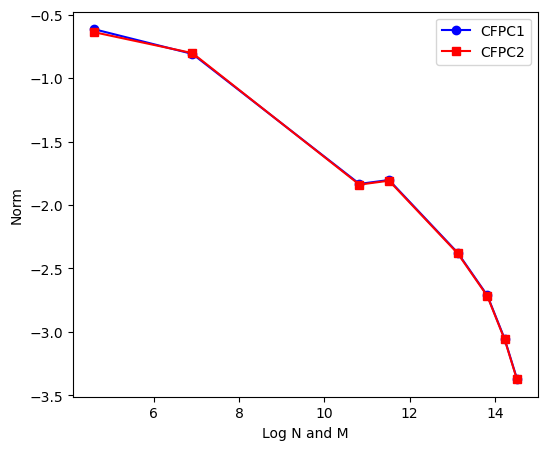

In [78]:

plt.figure(figsize=(6, 5))
plt.plot(np.log(results['N']), np.log(results['Avg_L2_z1']), marker='o', linestyle='-', color='blue', label='CFPC1')
plt.plot(np.log(results['N']), np.log(results['Avg_L2_z2']), marker='s', linestyle='-', color='red', label='CFPC2')
plt.xlabel('Log N and M')
plt.ylabel('Norm')
plt.legend()
plt.show()


In [ ]:
#for z3,z4 as unique
#ORDER: 1. FPCA on x, 2. FPCA on x,y, 3. CFPCA

#Average L2 Distance for z1: 9.894429909422342
#Average L2 Distance for z2: 9.581826127075548

#Average L2 Distance for z1: 6.638465773283956
#Average L2 Distance for z2: 7.743615358937818

#Average L2 Distance for z1: 0.4782623355683806
#Average L2 Distance for z2: 1.1247270091096655

In [ ]:
#for z1,z2 as unique 

#ORDER: 1. FPCA on x, 2. FPCA on x,y, 3. CFPCA
#SIM 1
#Average L2 Distance for z1: 2.979580743955875
#Average L2 Distance for z2: 0.657342506293054
    
#Average L2 Distance for z1: 5.438134921370114
#Average L2 Distance for z2: 8.250918379762537
    
#Average L2 Distance for z1: 1.9175882504581931
#Average L2 Distance for z2: 0.5280551125047566

#Sim 2
#Average L2 Distance for z1: 2.9886194970841733
#Average L2 Distance for z2: 3.861355775960032

#Average L2 Distance for z1: 5.788424122610188
#Average L2 Distance for z2: 7.6671181986465555
    
#Average L2 Distance for z1: 1.9168866647926228
#Average L2 Distance for z2: 0.5298213144234728



In [ ]:
#for w1,w2 as unique

#sim 3


#Average L2 Distance for z1: 5.45881674832201
#Average L2 Distance for z2: 5.48715640534793

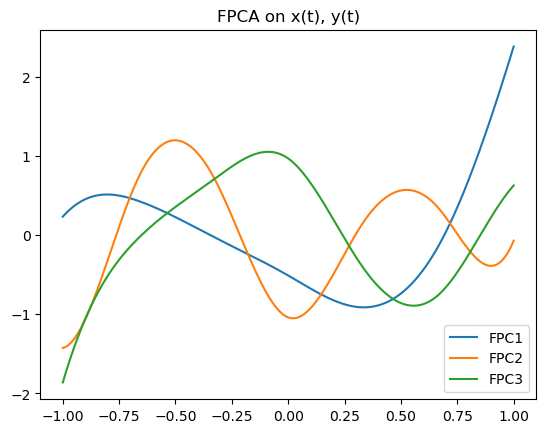

In [14]:
# Perform regressions for each combination of x(t) and y(t)
#residuals_list = []

#for i in range(N):
#    model = LinearRegression().fit(y_observations[i].reshape(-1, 1), x_observations[i])
 #   x_pred = model.predict(y_observations[i].reshape(-1, 1))
 #   residuals = x_observations[i] - x_pred
 #   residuals_list.append(residuals)

# Convert residuals to FDataGrid format
residuals_fd = skfda.FDataGrid(x_observations+y_observations, t)

# Convert to Fourier basis representation
basis = BSplineBasis(n_basis=9)
basis_fd = residuals_fd.to_basis(basis)

# Perform FPCA on the residuals in basis representation
fpca = FPCA(n_components=3, components_basis=basis)
fpca.fit(basis_fd)

# Plot FPCA components
fpca.components_.plot()
plt.title("FPCA on x(t), y(t)")
plt.legend(["FPC1", "FPC2", "FPC3"], loc="lower right")
plt.show()